In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\wine.csv')

In [3]:
df.head()

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavonoids,non flavonoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluited wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
class label                      178 non-null int64
alcohol                          178 non-null float64
malic acid                       178 non-null float64
ash                              178 non-null float64
alcalinity of ash                178 non-null float64
magnesium                        178 non-null int64
total phenols                    178 non-null float64
flavonoids                       178 non-null float64
non flavonoid phenols            178 non-null float64
proanthocyanins                  178 non-null float64
color intensity                  178 non-null float64
hue                              178 non-null float64
OD280/OD315 of diluited wines    178 non-null float64
proline                          178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [5]:
df.describe()

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavonoids,non flavonoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluited wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
y=df.iloc[:,0].values  #target

In [7]:
x=df.iloc[:,1:].values #ft

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
cvs=cross_val_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
#divido il dataset

x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=500,random_state=0)
import numpy as np

In [11]:
#accuratezza albero desicionale

np.mean(cvs(forest,x_tr,y_tr))

0.9756666666666666

In [12]:
forest.fit(x_tr,y_tr)

RandomForestClassifier(n_estimators=500, random_state=0)

In [13]:
ft=list(df.iloc[:,1:].columns)
pd.DataFrame({'ft':ft,'imp':forest.feature_importances_}).sort_values('imp',ascending=False).head(7)

,ft,imp
12,proline,0.167345
9,color intensity,0.162590
6,flavonoids,0.153654
0,alcohol,0.126387
11,OD280/OD315 of diluited wines,0.120778
10,hue,0.074039
5,total phenols,0.061712


## Riduzione della dimensionalità

1. standardizzo
2. matrice covarianza
3. autovalori e autovettori
4. ordino autovalori

In [14]:
#standardizzo

x_trs,x_tss=scaler.fit_transform(x_tr),scaler.transform(x_ts)

In [15]:
#matrice covarianza

cov_mat=np.cov(x_trs.T)

In [16]:
#autovalori e autovettori

eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

In [17]:
#ordino

p=[(i/sum(eigen_vals)) for i in sorted(eigen_vals,reverse=True)]

In [18]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [19]:
fig=go.Figure()
fig.add_trace(go.Bar(y=p,marker_color='cyan'))
fig.add_trace(go.Scatter(y=np.cumsum(p),mode='lines',line_shape='hvh',marker_color='coral'))
fig.update_layout(plot_bgcolor='white',title='Importanza dei componenti')
fig.update_xaxes(gridcolor='lightgrey',linecolor='grey')
fig.update_yaxes(gridcolor='lightgrey',linecolor='grey')
fig.update_traces(marker=dict(line=dict(color='grey')))
fig.show()

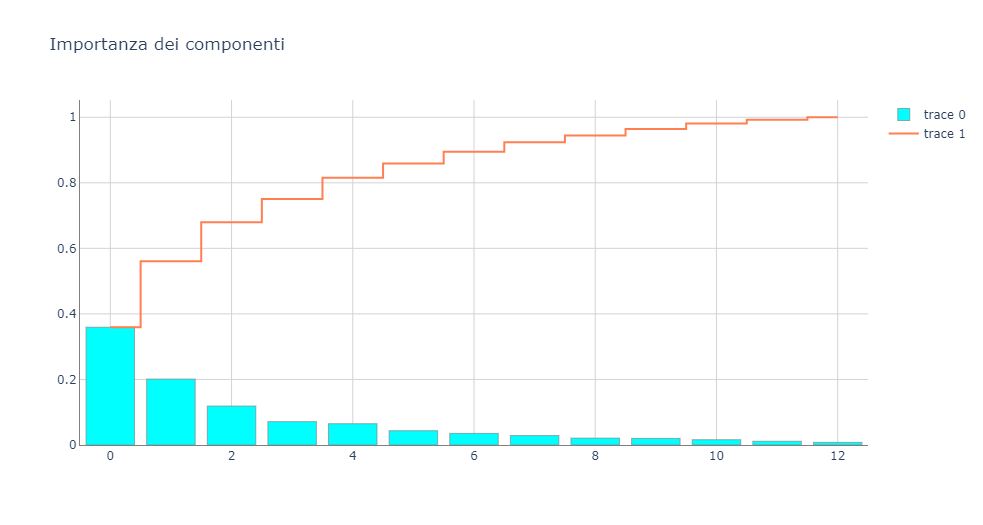

In [20]:
#i primi 2 componenti determinano il 60% della varianza del dataset (80% i primi 4)

## Adesso:
1. **PCA**  (senza supervisione)
2. **LDA**  (con   supervisione)
3. **KPCA** -dati non separabili linearmente-

In [21]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [22]:
#applico PCA

x_trs_pca,x_tss_pca=pca.fit_transform(x_trs),pca.transform(x_tss)

In [23]:
#eseguo regressione

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

logreg.fit(x_trs_pca,y_tr)

LogisticRegression()

In [24]:
logreg.score(x_tss_pca,y_ts)

0.9814814814814815

In [25]:
#oppure LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)

In [26]:
x_trs_lda,x_tss_lda=lda.fit_transform(x_trs,y_tr),lda.transform(x_tss)

In [27]:
logreg.fit(x_trs_lda,y_tr)

LogisticRegression()

In [28]:
logreg.score(x_tss_lda,y_ts)

0.9629629629629629

In [29]:
#KPCA

from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)

In [30]:
x_trs_kpca=kpca.fit_transform(x_trs)
x_tss_kpca=kpca.transform(x_tss)

In [31]:
logreg.fit(x_trs_kpca,y_tr)

LogisticRegression()

In [32]:
logreg.score(x_tss_kpca,y_ts)

0.3888888888888889